In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [58]:
with open("Clifford_En(1,2)_EnC(1,50)_pm(0.000,0.900,11)_alpha3.5_L16_T.pickle", "rb") as f:
    data = pickle.load(f)

In [31]:
data_ = {}
L_list = [16, 32, 64]
for L in L_list:
    # with open(f"Clifford_En(1,2)_EnC(1,200)_pm(0.500,0.900,11)_alpha3.5_L{L}_T.pickle", "rb") as f:
    # with open(f"Clifford_En(1,2)_EnC(1,1000)_pm(0.000,0.900,11)_alpha3.5_L{L}_T.pickle", "rb") as f:
    with open(f"Clifford_En(1,2)_EnC(1,1000)_pm(0.000,0.900,11)_alpha0.5_L{L}_T.pickle", "rb") as f:
        data_[L] = pickle.load(f)

In [23]:
with open("Clifford_En(1,2)_EnC(1,50)_pm(0.500,0.900,11)_alpha3.5_L64_T.pickle", "rb") as f:
    data2 = pickle.load(f)

In [5]:
data['Mz'].shape

(11, 1, 49, 843)

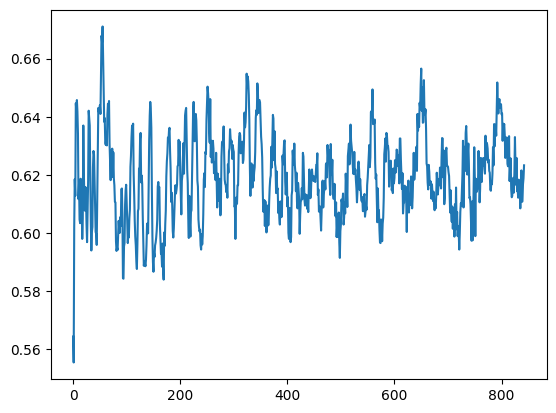

In [27]:
plt.plot(data['Mz'][0,0].mean(axis=0))

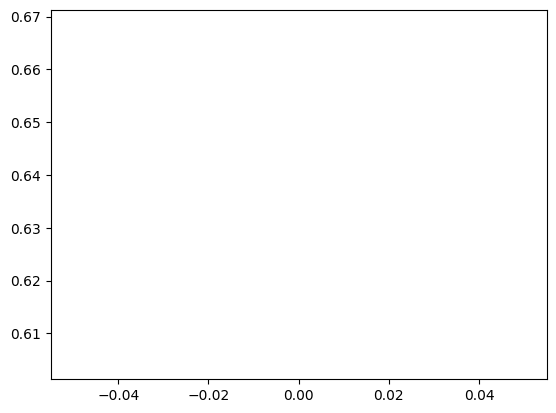

In [74]:
plt.plot(data_[16]['OP'][5,0].mean(axis=0))

In [51]:
data_[16]['Mz'][0,0]

array([[0.     , 0.53125, 0.53125, ..., 0.59375, 0.625  , 0.53125],
       [0.     , 0.53125, 0.71875, ..., 0.6875 , 0.625  , 0.53125],
       [0.     , 0.5    , 0.6875 , ..., 0.6875 , 0.6875 , 0.75   ],
       ...,
       [0.     , 0.53125, 0.59375, ..., 0.625  , 0.625  , 0.625  ],
       [0.     , 0.5625 , 0.6875 , ..., 0.59375, 0.59375, 0.625  ],
       [0.     , 0.5    , 0.5    , ..., 0.59375, 0.75   , 0.625  ]],
      shape=(199, 90))

In [12]:
x.shape

(1,)

In [ ]:
plt.plot()

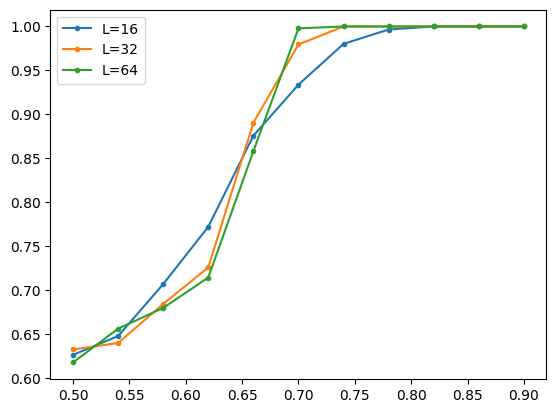

In [57]:
x=np.linspace(0.5,0.9,11)
for L in L_list:
    y=data_[L]['Mz'].mean(axis=-2)[...,-1]
    plt.plot(x,y,'.-',label=f'L={L}')
plt.legend()

In [68]:
y.shape

(11, 1)

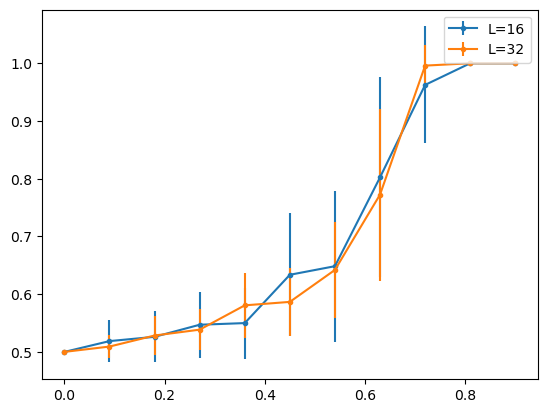

In [9]:
x=np.linspace(0.0,0.9,11)
for L in L_list:
    y=data_[L]['OP'].mean(axis=-2)[...,-1].flatten()
    yerr= data_[L]['OP'].std(axis=-2)[...,-1].flatten()
    plt.errorbar(x, y, yerr=yerr, fmt='.-', label=f'L={L}')
plt.legend()

(0.0, 8.0)

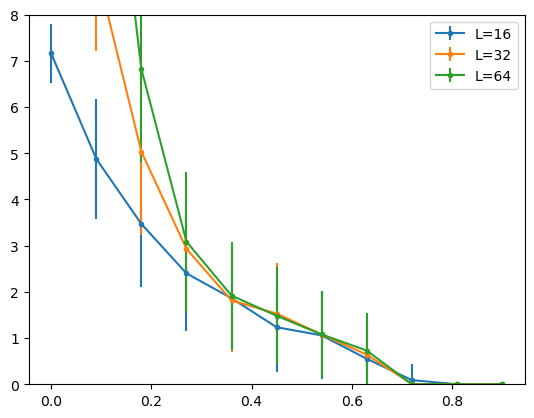

In [13]:
x=np.linspace(0.0,0.9,11)
for L in L_list:
    y=data_[L]['EE'].mean(axis=-2)[...,-1].flatten()
    yerr= data_[L]['EE'].std(axis=-2)[...,-1].flatten()
    plt.errorbar(x, y, yerr=yerr, fmt='.-', label=f'L={L}')
plt.legend()
plt.ylim(0,8)

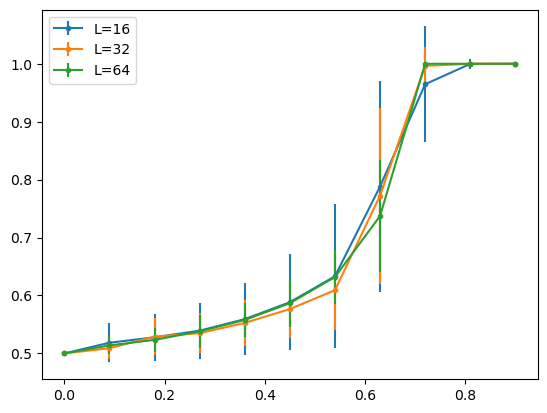

In [32]:
x=np.linspace(0.0,0.9,11)
for L in L_list:
    y=data_[L]['OP'].mean(axis=-2)[...,-1].flatten()
    yerr= data_[L]['OP'].std(axis=-2)[...,-1].flatten()
    plt.errorbar(x, y, yerr=yerr, fmt='.-', label=f'L={L}')
plt.legend()

(0.4, 1.0)

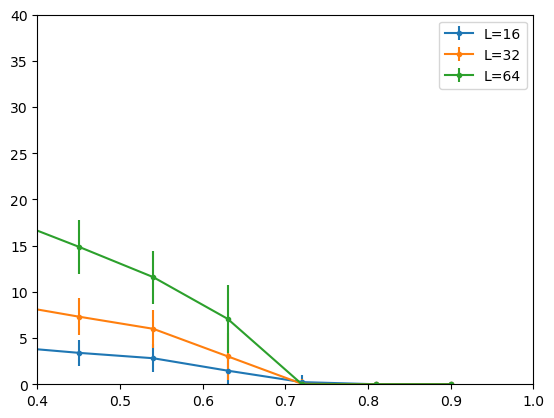

In [36]:
x=np.linspace(0.0,0.9,11)
for L in L_list:
    y=data_[L]['EE'].mean(axis=-2)[...,-1].flatten()
    yerr= data_[L]['EE'].std(axis=-2)[...,-1].flatten()
    plt.errorbar(x, y, yerr=yerr, fmt='.-', label=f'L={L}')
plt.legend()
plt.ylim(0,40)
plt.xlim(0.4,1)

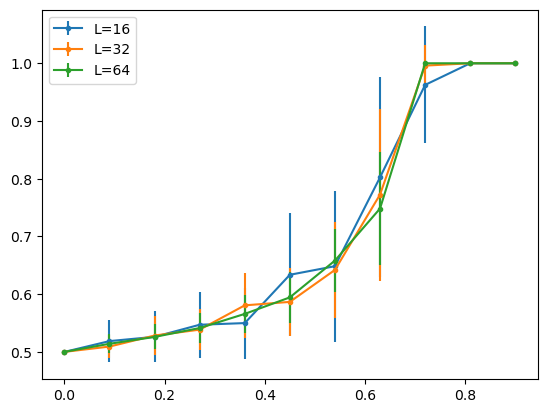

In [3]:
x=np.linspace(0.0,0.9,11)
for L in L_list:
    y=data_[L]['OP'].mean(axis=-2)[...,-1].flatten()
    yerr= data_[L]['OP'].std(axis=-2)[...,-1].flatten()
    plt.errorbar(x, y, yerr=yerr, fmt='.-', label=f'L={L}')
plt.legend()

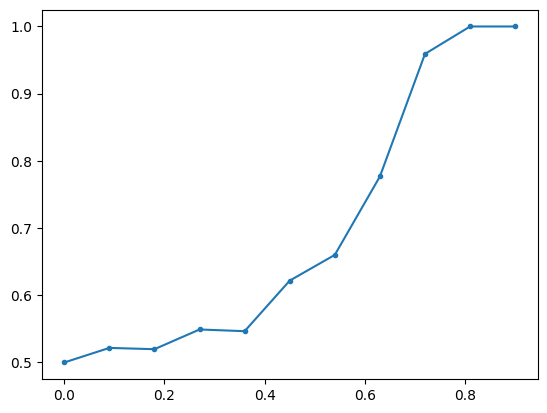

In [60]:
x=np.linspace(0.0,0.9,11)
y=data['OP'].mean(axis=-2)[...,-1]
plt.plot(x,y,'.-')

# Profiler

In [1]:
%load_ext line_profiler

In [2]:
from rqc_sv.clifford import Clifford
import stim

In [7]:
L=64
cliff = Clifford(L=L, seed=0, seed_C=0, store_op=False, alpha=0.5)

In [11]:
def run_sparse(galois=False):
    tf = int(L**1.6)
    OP_list = []
    OP2_list = []
    coherence_list = []
    EE_list = []
    for i in range(tf):
        cliff.random_circuit(p_m=0.6)
        OP_list.append(cliff.OP())
        OP2_list.append(cliff.OP2_sparse())
        coherence_list.append(cliff.quantum_L1_coherence(galois=galois))
        EE_list.append(cliff.half_system_entanglement_entropy(galois=galois))
    # return OP_list, OP2_list

In [12]:
%lprun -f run_sparse run_sparse(galois=False)

Timer unit: 1e-09 s

Total time: 3.04954 s
File: /tmp/ipykernel_1268123/1719384543.py
Function: run_sparse at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def run_sparse(galois=False):
     2         1       4879.0   4879.0      0.0      tf = int(L**1.6)
     3         1        962.0    962.0      0.0      OP_list = []
     4         1        661.0    661.0      0.0      OP2_list = []
     5         1        691.0    691.0      0.0      coherence_list = []
     6         1        611.0    611.0      0.0      EE_list = []
     7       777     355377.0    457.4      0.0      for i in range(tf):
     8       776 1362453412.0 1.76e+06     44.7          cliff.random_circuit(p_m=0.6)
     9       776   34464182.0  44412.6      1.1          OP_list.append(cliff.OP())
    10       776 1125948744.0 1.45e+06     36.9          OP2_list.append(cliff.OP2_sparse())
    11       776  254543202.0 328019.6      8.3          cohe

In [13]:
%lprun -f run_sparse run_sparse(galois=True)

Timer unit: 1e-09 s

Total time: 18.9339 s
File: /tmp/ipykernel_1268123/1719384543.py
Function: run_sparse at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def run_sparse(galois=False):
     2         1       1944.0   1944.0      0.0      tf = int(L**1.6)
     3         1        371.0    371.0      0.0      OP_list = []
     4         1        331.0    331.0      0.0      OP2_list = []
     5         1        281.0    281.0      0.0      coherence_list = []
     6         1        271.0    271.0      0.0      EE_list = []
     7       777     479622.0    617.3      0.0      for i in range(tf):
     8       776 1314782489.0 1.69e+06      6.9          cliff.random_circuit(p_m=0.6)
     9       776   34963662.0  45056.3      0.2          OP_list.append(cliff.OP())
    10       776  993441520.0 1.28e+06      5.2          OP2_list.append(cliff.OP2_sparse())
    11       776 7691798072.0 9.91e+06     40.6          cohe

In [20]:
%lprun -f run_sparse2 run_sparse2()

Timer unit: 1e-09 s

Total time: 0.519836 s
File: /tmp/ipykernel_1265607/1420865567.py
Function: run_sparse2 at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def run_sparse2():
     2         1       2585.0   2585.0      0.0      tf = int(L**1.6)
     3         1        340.0    340.0      0.0      OP_list = []
     4         1        240.0    240.0      0.0      OP2_list = []
     5         1        230.0    230.0      0.0      coherence_list = []
     6                                               # EE_list = []
     7       257      99758.0    388.2      0.0      for i in range(tf):
     8       256  239375485.0 935060.5     46.0          cliff.random_circuit(p_m=0.1)
     9       256    9787943.0  38234.2      1.9          OP_list.append(cliff.OP())
    10       256  241011388.0 941450.7     46.4          OP2_list.append(cliff.OP2_sparse())
    11       256   29557963.0 115460.8      5.7          coherence_l

In [9]:
GF2 = galois.GF(2)

In [10]:
GF2(np.array([[1,0,1],[0,1,1]]))

GF([[1, 0, 1],
    [0, 1, 1]], order=2)

In [14]:
np.triu_indices(4,k=1)

(array([0, 0, 0, 1, 1, 2]), array([1, 2, 3, 2, 3, 3]))

In [1]:
from rqc_sv.clifford import Clifford


In [2]:
cliff = Clifford(L=64, seed=0, seed_C=0)


In [3]:
for _ in range(100):
    cliff.random_circuit(p_m=0.3)

In [4]:
assert cliff.quantum_L1_coherence() == cliff.quantum_L1_coherence_fast()


In [8]:
cliff.quantum_L1_coherence()

53

In [5]:
cliff.quantum_L1_coherence_fast()

53

In [6]:

%timeit cliff.quantum_L1_coherence() 

4.88 ms ± 55.5 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [7]:
%timeit cliff.quantum_L1_coherence_fast() 

266 μs ± 994 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [7]:
%lprun -f cliff.OP2 run()

Timer unit: 1e-09 s

Total time: 2.22545 s
File: /home/hnpan/control_transition/rqc_sv/clifford.py
Function: Clifford.OP2 at line 135

Line #      Hits         Time  Per Hit   % Time  Line Contents
   135                                               def OP2(self):
   136                                                   """<OP^2> = (1/4L^2) [L^2 + 2L*sum_i<Z_i> + sum_{i,j}<Z_i Z_j>]. Uses pre-cached PauliStrings."""
   137       776   12868433.0  16583.0      0.6          z_exp = np.array([self.sim.peek_z(i) for i in range(self.L)])
   138       776    7241896.0   9332.3      0.3          sum_z = np.sum(z_exp)
   139                                           
   140                                                   # sum_{i,j} <Z_i Z_j> (includes diagonal Z_i^2 = 1)
   141       776     365203.0    470.6      0.0          zz_total = float(self.L)  # Diagonal contribution
   142   1565192  472301044.0    301.8     21.2          for (i, j), pauli in self._zz_paulis.items():
   143   156

In [5]:
%lprun -f cliff.sim.do_tableau run()

/home/hnpan/.pyenv/versions/miniforge3-25.3.1-0/lib/python3.12/site-packages/line_profiler/ipython_extension.py:97: UserWarning: Could not extract a code object for the object <bound method PyCapsule.do_tableau of <stim._stim_sse2.TableauSimulator object at 0x71ef3c3bc870>>
  profile = LineProfiler(*funcs)


Timer unit: 1e-09 s

In [ ]:
%lprun -f cliff.sim.do_tableau run()

In [10]:
class TableauTimer:
    def __init__(self):
        self.total_time = 0
        self.call_count = 0
        self.original = stim.TableauSimulator.do_tableau
        
        # Create wrapper that preserves method signature
        def wrapper(sim_self, *args, **kwargs):
            start = time.perf_counter()
            result = self.original(sim_self, *args, **kwargs)
            self.total_time += time.perf_counter() - start
            self.call_count += 1
            return result
        
        self.wrapper = wrapper
    
    def report(self):
        print(f"do_tableau: {self.call_count} calls, {self.total_time:.6f}s total, "
              f"{self.total_time/self.call_count*1e6:.2f}μs avg")

In [11]:
timer = TableauTimer()
stim.TableauSimulator.do_tableau = timer.wrapper

%lprun -f cliff.sim.do_tableau run()
timer.report()

do_tableau: 96686 calls, 0.880779s total, 9.11μs avg


Timer unit: 1e-09 s

Total time: 0.951885 s
File: /tmp/ipykernel_1235287/2870693882.py
Function: TableauTimer.__init__.<locals>.wrapper at line 8

Line #      Hits         Time  Per Hit   % Time  Line Contents
     8                                                   def wrapper(sim_self, *args, **kwargs):
     9     96686   34029861.0    352.0      3.6              start = time.perf_counter()
    10     96686  815351287.0   8433.0     85.7              result = self.original(sim_self, *args, **kwargs)
    11     96686   36608637.0    378.6      3.8              self.total_time += time.perf_counter() - start
    12     96686   28316004.0    292.9      3.0              self.call_count += 1
    13     96686   37578963.0    388.7      3.9              return result

In [7]:
%lprun -f cliff.random_circuit run()

Timer unit: 1e-09 s

Total time: 1.31562 s
File: /home/hnpan/control_transition/rqc_sv/clifford.py
Function: Clifford.random_circuit at line 100

Line #      Hits         Time  Per Hit   % Time  Line Contents
   100                                               def random_circuit(self, p_m):
   101                                                   """Execute one timestep with 5 layers."""
   102                                                   # Layer 1: Odd Measurements
   103     25608    8045262.0    314.2      0.6          for i, j in self.odd_pairs:
   104     24832   15455412.0    622.4      1.2              if self.rng_C.random() < p_m:
   105      2512   50005839.0  19906.8      3.8                  self.measure_pair(i, j)
   106                                           
   107                                                   # Layer 2: Odd Unitaries
   108     25608    8516373.0    332.6      0.6          for i, j in self.odd_pairs:
   109     24832  260017151.0  10471.1   

In [22]:
x_sec, z_sec = cliff.get_tableau()

In [24]:
import galois

In [25]:
GF2 = galois.GF(2)


In [29]:
np.linalg.matrix_rank(GF2((x_sec).astype(int)))

3

In [30]:
np.linalg.matrix_rank(GF2((z_sec).astype(int)))

16

In [ ]:
k